# Real Estate Analysis

## Import necessary libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import math 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Read the given csv file as a dataframe.

In [2]:
data = pd.read_csv('Realestate.csv')
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Performing EDA on the data 

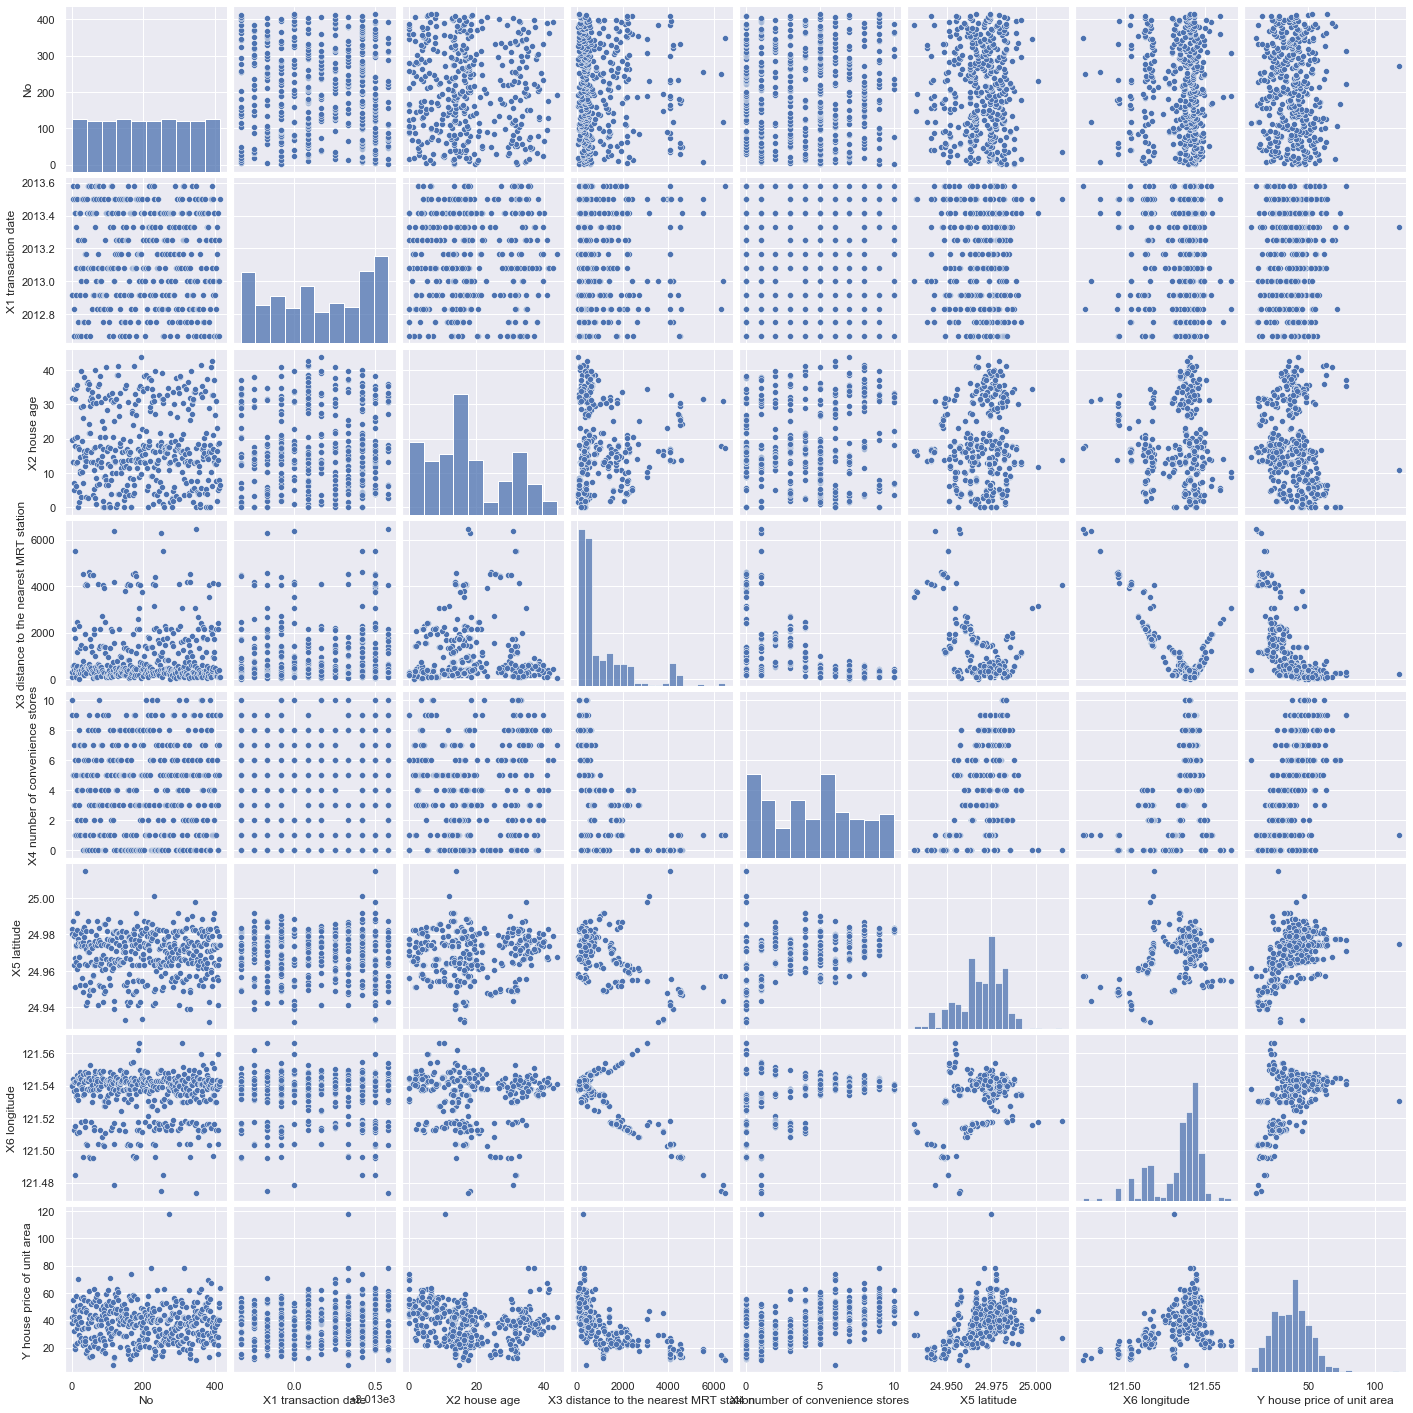

In [3]:
sns.pairplot(data)

# Here each subplot shows the relationship between the pairs of variables(columns) in the dataframe.

<AxesSubplot: xlabel='Y house price of unit area', ylabel='Density'>

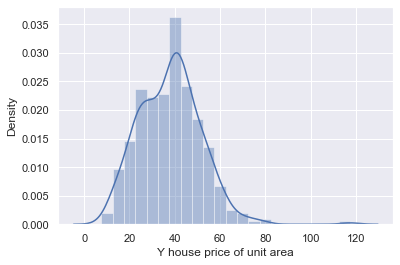

In [4]:
sns.distplot(data['Y house price of unit area'])
# distribution plot of a column in the dataframe.

<AxesSubplot: >

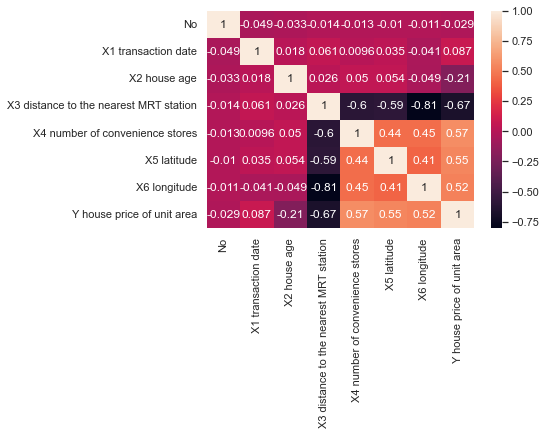

In [5]:
sns.heatmap(data.corr(),annot=True)

From the above plots we can see that the house price of unit are is inversely proportional to distance to the nearest MRT station, houseage and longitude. This means that as the distance from the MRT station increases, the unit price decreases. Latitude has very less variation and has no effect on price. And no effect of transaction date can be seen on unit price.

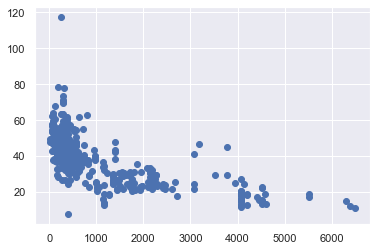

In [6]:
# we have seen in the above plots that the the house price of unit
# area is inversely proportional to distance to the nearest MRT station
X = data['X3 distance to the nearest MRT station']
Y = data['Y house price of unit area']
plt.scatter(X,Y)
plt.show()

Although there are some outliers, but for majority
of the cases the above analysis is true.

## Choosing number of features(as inputs) for prediction of the “house price of unit area”. Preparing the input and target (output) variables.

In [7]:
X = data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X6 longitude']]
y = data['Y house price of unit area']

In [8]:
from sklearn.model_selection import train_test_split

## Spliting the data into training and test dataset (20%test).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =101)
print(X_train.shape,X_test.shape,X.shape)

(331, 4) (83, 4) (414, 4)


## Performing necessary preprocessing step.

In [10]:
# replacing all the NaN values by 0 in the dataset.
data.fillna(0,inplace=True)
# normalization of columns.
scaler = MinMaxScaler()
df =pd.DataFrame(scaler.fit_transform(data),
                 columns=data.columns, index=data.index)
print(df)

           No  X1 transaction date  X2 house age  \
0    0.000000             0.272926      0.730594   
1    0.002421             0.272926      0.445205   
2    0.004843             1.000000      0.303653   
3    0.007264             0.909389      0.303653   
4    0.009685             0.181223      0.114155   
..        ...                  ...           ...   
409  0.990315             0.363537      0.312785   
410  0.992736             0.000000      0.127854   
411  0.995157             0.636463      0.429224   
412  0.997579             0.363537      0.184932   
413  1.000000             0.909389      0.148402   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  0.009513                              1.0   
1                                  0.043809                              0.9   
2                                  0.083315                              0.5   
3                                  0.083315            

## Using regression models to predict house price from the selected features.

In [11]:
lm = LinearRegression()


In [12]:
X = data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X6 longitude']]
y = data['Y house price of unit area']
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
predictions = lm.predict(X_test)

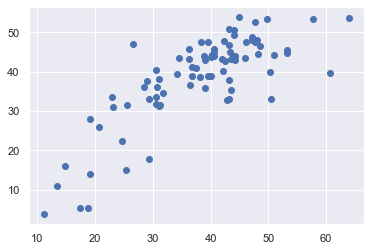

In [15]:
plt.scatter(y_test,predictions)

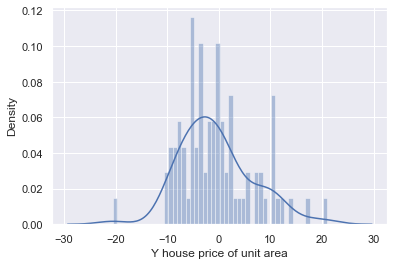

In [16]:
sns.distplot((y_test-predictions),bins=50);

## Ploynomial Regression

In [17]:
X = data[['X3 distance to the nearest MRT station']]
y = data['Y house price of unit area']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=101)
print(X_train.shape,X_test.shape,X.shape)

(331, 1) (83, 1) (414, 1)


RMSE Test: 6.783324472305418
RMSE Training: 9.9061003159891


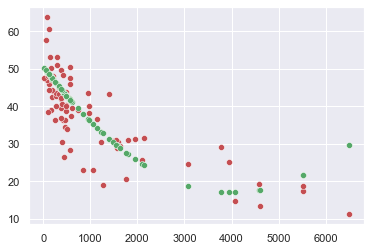

In [18]:
## builiding model
poly_model = make_pipeline(PolynomialFeatures(degree=2,include_bias=True),
                           LinearRegression())
## training
# print(type(X_train))
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
poly_model.fit(X_train,y_train)

# evaluation
yfit = poly_model.predict(X_test)
yfit_training = poly_model.predict(X_train)
sns.scatterplot(X_test[:,0],y_test,color='r')# ground_truth

sns.scatterplot(X_test[:,0],yfit,color='g')# prediction

print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test,yfit)))
print('RMSE Training:',np.sqrt(metrics.mean_squared_error(y_train,yfit_training)))

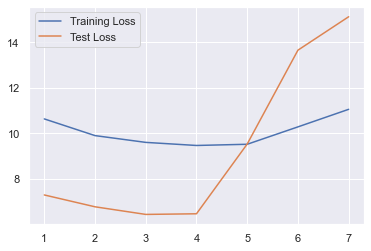

In [19]:
# Finding the best M
collect_training_loss = []
collect_test_loss = []
collect_m = []
for m in[1,2,3,4,5,6,7]:
    poly_model = make_pipeline(PolynomialFeatures(degree=m,include_bias=True),LinearRegression())
    poly_model.fit(X_train,y_train)
    # evaluation
    yfit = poly_model.predict(X_test)
    yfit_training = poly_model.predict(X_train)
    
    collect_test_loss.append(np.sqrt(metrics.mean_squared_error(y_test,yfit)))
    collect_training_loss.append(np.sqrt(metrics.mean_squared_error(y_train,yfit_training)))
    collect_m.append(m)


sns.lineplot(collect_m,collect_training_loss)
sns.lineplot(collect_m,collect_test_loss)
plt.legend(labels =['Training Loss','Test Loss'])

15.119759563386044


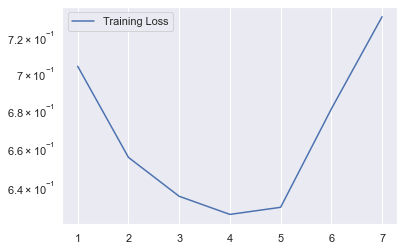

In [20]:
maxi = np.max([np.max(collect_training_loss),np.max(collect_test_loss)])
print(maxi)
g_results = sns.lineplot(collect_m,collect_training_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Training Loss'])

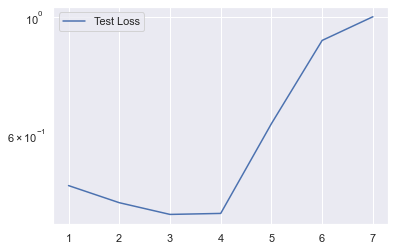

In [21]:
g_results = sns.lineplot(collect_m,collect_test_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Test Loss'])

Evaluating and comparing the models using MAE, MSE, andRMSE metrics on the test dataset.

In [22]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.483550919750992
MSE: 49.55675519010644
RMSE: 7.039655899978809
